# 1. Install Package and Import Libraries

In [1]:
!pip install split-folders

In [2]:
!pip install tensorflow -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 94.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 95.6 MB/s eta 0:00:00:00:01
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2

In [3]:
!pip install scikit-learn -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 86.2 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


In [4]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 2.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 4.3 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 101.1 MB/s eta 0:00:0000:01
  Attempting uninstall: packaging
    Found existing installation: packaging 25.0
    Uninstalling packaging-25.0:
      Successfully uninstalled packaging-25.0
  Attempting uninstall: ml_dtypes
    Found existing installation: ml_dtypes 0.5.1
    Uninstalling ml_dtypes-0.5.1:
      Successfully uninstalled ml_dtypes-0.5.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0


In [5]:
import os, shutil
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm as tq
import splitfolders

import kagglehub
from google.colab import files

import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import cv2
import skimage
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise

import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau
import tensorflowjs as tfjs

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

2025-06-04 05:38:26.551581: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749015506.569055      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749015506.574254      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# 2. GPU Preparation

In [6]:
!nvidia-smi

Wed Jun  4 05:38:36 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [7]:
strategy = tf.distribute.MirroredStrategy(["GPU:0", "GPU:1"])

I0000 00:00:1749015518.966397      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1749015518.967066      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [8]:
print(f"Number of GPUs Available: {strategy.num_replicas_in_sync}")

Number of GPUs Available: 2


In [9]:
print("Available GPUs:", tf.config.list_physical_devices('GPU'))

Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


# 3. Data Preparation

In [10]:
ds_dir = '/kaggle/input/dataset/gambar'
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
CHANNELS = 3

In [11]:
# hitung total data gambar pada folder
def count_images(directory, extensions=('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
    total_img = 0
    # os.walk traverses all subdirectories
    for root, dirs, files in os.walk(directory):
        # Filter file yang cocok dengan format file gambar pada umumnya
        img_files = [file for file in files if file.lower().endswith(extensions)]
        total_img += len(img_files)
    return total_img

total = count_images(ds_dir)
print("Total images:", total)

Total images: 500


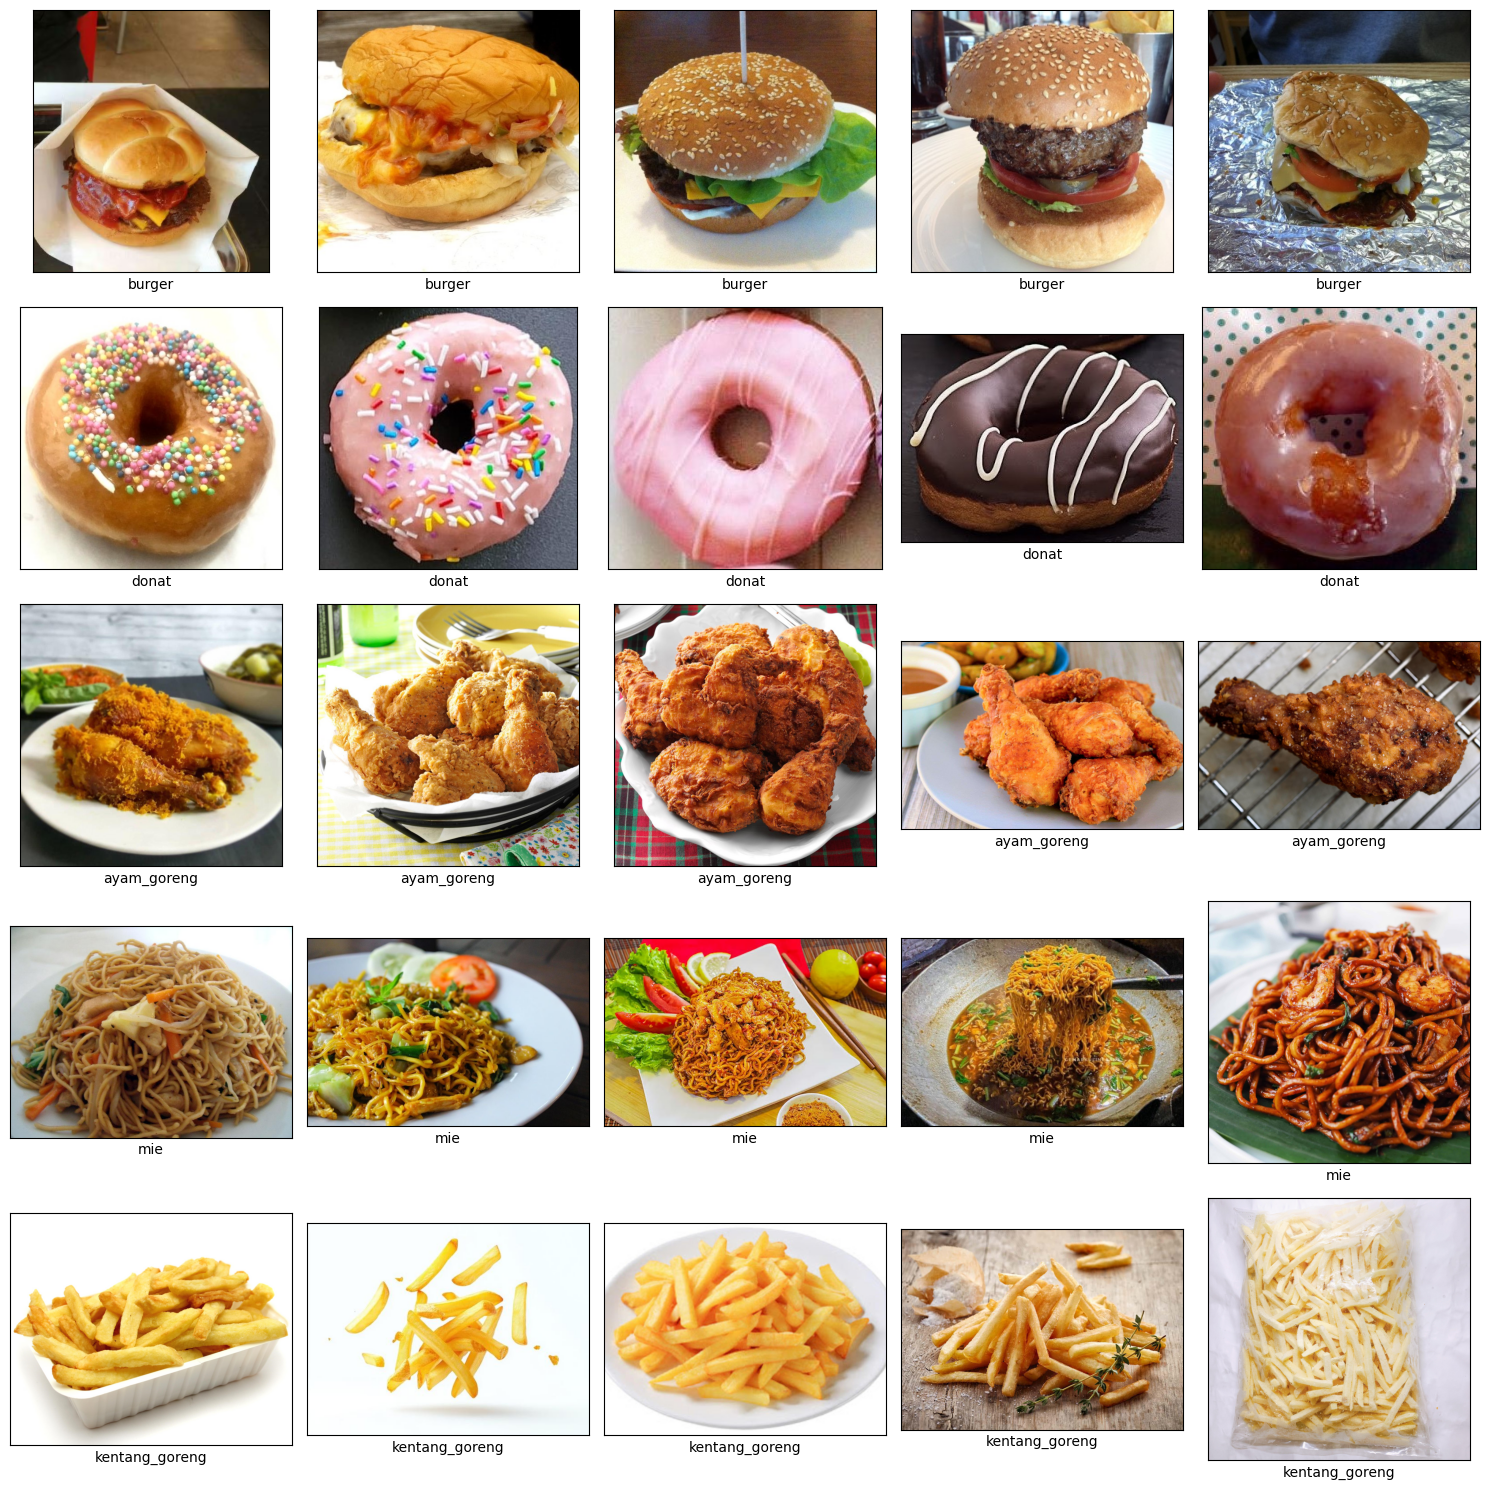

In [12]:
# Buat sebuah dictionary yang menyimpan gambar dari tiap kelas pada dataset
food_image = {}

# Spesifikasikan path sumber dataset
path = "/kaggle/input/dataset/"
path_sub = os.path.join(path, "gambar")
for i in os.listdir(path_sub):
    food_image[i] = os.listdir(os.path.join(path_sub, i))

# Tampilkan 5 gambar dari 5 kelas secara random
path_sub = "/kaggle/input/dataset/gambar/"

fig, axs = plt.subplots(len(food_image.keys()), 5, figsize=(15, 15))

for i, class_name in enumerate(os.listdir(path_sub)):
    images = np.random.choice(food_image[class_name], 5, replace=False)

    for j, image_name in enumerate(images):
        img_path = os.path.join(path_sub, class_name, image_name)
        img = Image.open(img_path)
        axs[i, j].imshow(img)
        axs[i, j].set(xlabel=class_name, xticks=[], yticks=[])


fig.tight_layout()

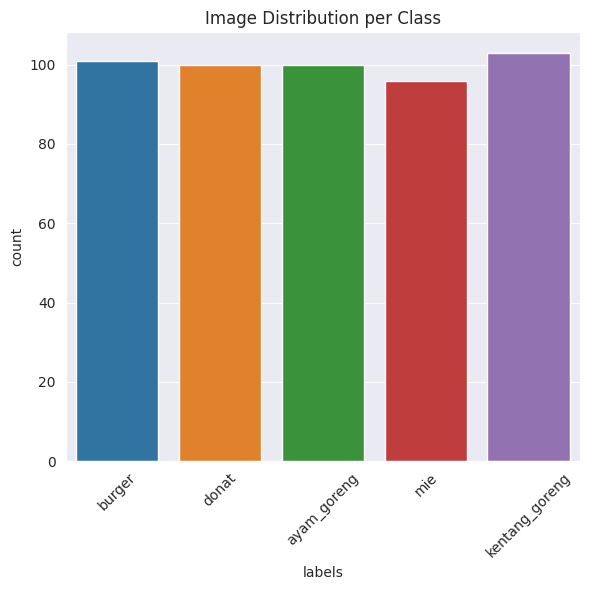

In [13]:
# Spesifikasikan path sumber dataset
food_path = "/kaggle/input/dataset/gambar"

# Buat list yang menyimpan data untuk tiap nama file
file_name = []
labels = []
full_path = []

# Dapatkan nama gambar, file path, dan kelas satu persatu dengan cara looping
for path, subdirs, files in os.walk(food_path):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)

distribution_train = pd.DataFrame({"path":full_path, 'file_name':file_name, "labels":labels})

# Distribubsikan gambar tiap kelas
plt.figure(figsize=(6, 6))
sns.set_style("darkgrid")
plot_data = sns.countplot(x="labels", data=distribution_train)
plt.xticks(rotation=45)  # Optional: rotasi label biar gak numpuk
plt.title("Image Distribution per Class")
plt.tight_layout()
plt.show()

Dari grafik batang di atas, dapat dilihat bahwa distribusi gambar tiap kelas seimbang

# 4. Data Preprocessing

In [14]:
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(ds_dir, output="splitted_dataset",
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)

Copying files: 500 files [00:07, 65.32 files/s] 


In [15]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        fill_mode='nearest',
        horizontal_flip=True,
)
train_generator = train_datagen.flow_from_directory(
        'splitted_dataset/train',
        target_size=(IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode="sparse",
        shuffle=True, 
        seed=1337
)

Found 398 images belonging to 5 classes.


In [16]:
validation_datagen = ImageDataGenerator(
        rescale=1./255
        )
validation_generator = validation_datagen.flow_from_directory(
        'splitted_dataset/val',
        target_size=(IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode="sparse",
        shuffle=True, 
        seed=1337
)

Found 49 images belonging to 5 classes.


In [17]:
test_datagen = ImageDataGenerator(
        rescale=1./255
        )

test_generator = test_datagen.flow_from_directory(
        'splitted_dataset/test',
        target_size=(IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode="sparse",
        shuffle=True, 
        seed=1337
)

Found 53 images belonging to 5 classes.


In [18]:
train_generator.class_indices

{'ayam_goreng': 0, 'burger': 1, 'donat': 2, 'kentang_goreng': 3, 'mie': 4}

In [19]:
class_names = list(train_generator.class_indices.keys())
class_names

['ayam_goreng', 'burger', 'donat', 'kentang_goreng', 'mie']

Jadi, ada 5 kelas makanan pada dataset ini

# 5. Modelling

In [20]:
mobile_net_base = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                              include_top=False,
                              weights='imagenet')
for layer in mobile_net_base.layers:
    layer.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [21]:
with strategy.scope():
    # Model architecture
    model = tf.keras.models.Sequential([
        mobile_net_base,
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax')
    ])

    # Compile model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Callbacks
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )

    lr_reduction = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        patience=3,
        verbose=1,
        factor=0.5,
        min_lr=0.00001
    )

    # Fit model
    history = model.fit(
        train_generator,
        epochs=28,
        validation_data=validation_generator,
        callbacks=[early_stopping, lr_reduction]
    )

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/28


E0000 00:00:1749015548.794493      35 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1749015550.343664     129 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1749015550.345095     128 cuda_dnn.cc:529] Loaded cuDNN version 90300


13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 807ms/step - accuracy: 0.3375 - loss: 1.8952 - val_accuracy: 0.9753 - val_loss: 0.0586 - learning_rate: 0.0010
Epoch 2/28
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 614ms/step - accuracy: 0.9385 - loss: 0.1941 - val_accuracy: 0.9506 - val_loss: 0.1796 - learning_rate: 0.0010
Epoch 3/28
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 608ms/step - accuracy: 0.9511 - loss: 0.1308 - val_accuracy: 1.0000 - val_loss: 2.0213e-04 - learning_rate: 0.0010
Epoch 4/28
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 601ms/step - accuracy: 0.9897 - loss: 0.0245 - val_accuracy: 0.9753 - val_loss: 0.0766 - learning_rate: 0.0010
Epoch 5/28
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 639ms/step - accuracy: 0.9826 - loss: 0.0455 - val_accuracy: 0.9753 - val_loss: 0.0478 - learning_rate: 0.0010
Epoch 6/28
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step - accuracy: 0.9985 - loss: 0.0218
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 596ms/step - accuracy: 0.9984 - loss: 0.0219 - val_acc

# 6. Evaluasi 

In [22]:
if early_stopping.stopped_epoch > 0:
    stop_epoch = early_stopping.stopped_epoch - 5
else:
    stop_epoch = len(history.history['loss']) - 1  # Last epoch index

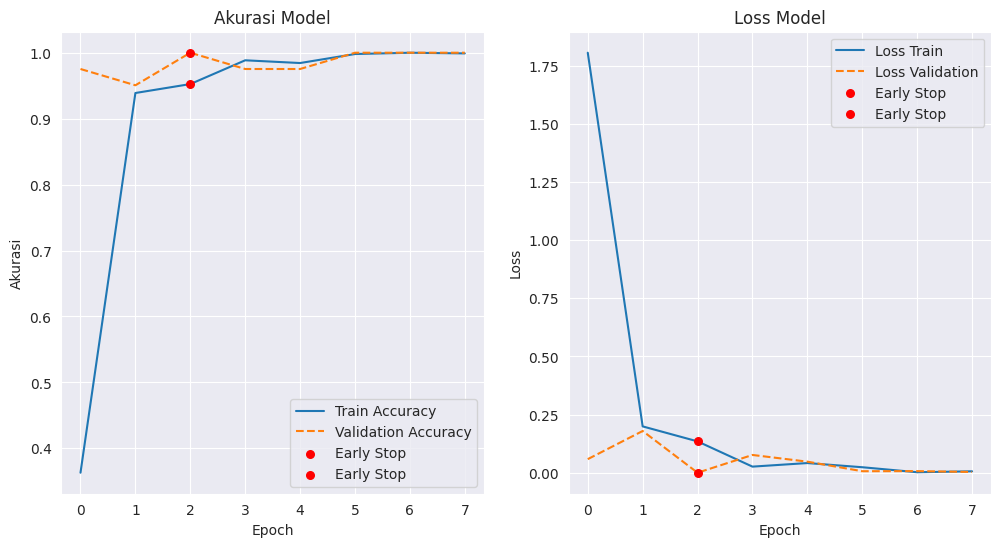

In [23]:
# Create the plots
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
# Add a red dot at the stopping epoch on the validation accuracy curve
plt.scatter(stop_epoch, history.history['accuracy'][stop_epoch], color='red', s=30, zorder=5, label='Early Stop')
plt.scatter(stop_epoch, history.history['val_accuracy'][stop_epoch], color='red', s=30, zorder=5, label='Early Stop')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Train')
plt.plot(history.history['val_loss'], label='Loss Validation', linestyle='--')
# Add a red dot at the stopping epoch on the validation loss curve
plt.scatter(stop_epoch, history.history['loss'][stop_epoch], color='red', s=30, zorder=5, label='Early Stop')
plt.scatter(stop_epoch, history.history['val_loss'][stop_epoch], color='red', s=30, zorder=5, label='Early Stop')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [24]:
plt.savefig('model_evaluation_plt.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [25]:
true_classes = []
predicted_classes = []

for images, labels in test_generator:
    predictions = model.predict(images)
    predicted_classes_batch = np.argmax(predictions, axis=1)

    true_classes.extend(labels)
    predicted_classes.extend(predicted_classes_batch)

    if len(true_classes) >= test_generator.samples:
        break

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [26]:
class_labels = [label for label, idx in sorted(train_generator.class_indices.items(), key=lambda item: item[1])]

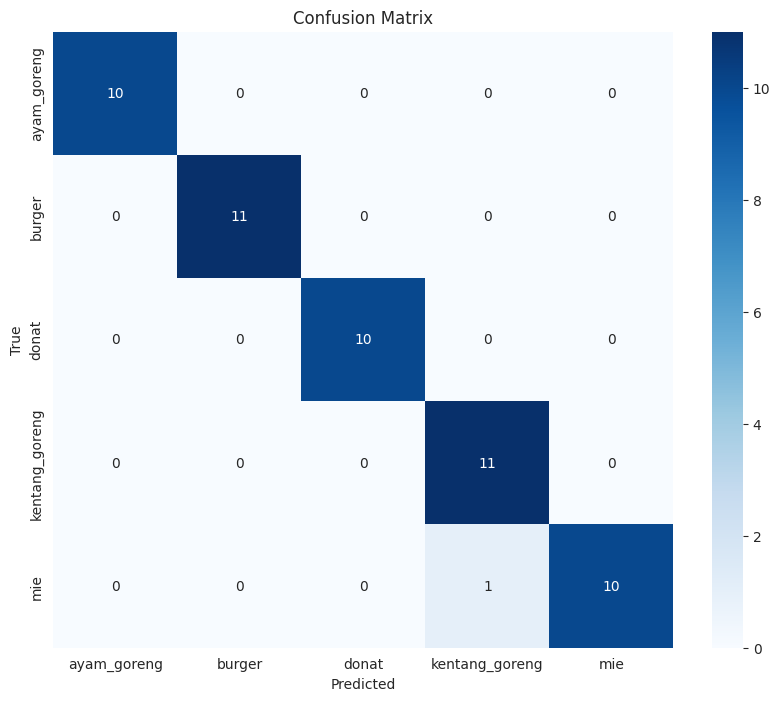

In [27]:
# confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

plt_cm = plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [28]:
plt_cm.savefig('confusionmatrix_plt.png', dpi=300, bbox_inches='tight')

In [29]:
# cek f1-score, recall, precission, and support
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=list(class_labels)))

Classification Report:
                precision    recall  f1-score   support

   ayam_goreng       1.00      1.00      1.00        10
        burger       1.00      1.00      1.00        11
         donat       1.00      1.00      1.00        10
kentang_goreng       0.92      1.00      0.96        11
           mie       1.00      0.91      0.95        11

      accuracy                           0.98        53
     macro avg       0.98      0.98      0.98        53
  weighted avg       0.98      0.98      0.98        53



Dapat kita lihat f1-score dari tiap kelas adalah 100%

In [30]:
# Evaluasi training
train_loss, train_accuracy = model.evaluate(train_generator, verbose=0)
print("Training Accuracy:", train_accuracy)

# Evaluasi testing
test_loss, test_accuracy = model.evaluate(test_generator, verbose=0)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.9804649949073792


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Test Accuracy: 0.9882352948188782


# 7. Export and Convert Model

In [31]:
# Nama folder untuk menyimpan file models
folder_name = "models"

# Cek apakah folder sudah ada, jika belum maka buat
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    print(f"Folder '{folder_name}' berhasil dibuat.")
else:
    print(f"Folder '{folder_name}' sudah ada.")

Folder 'models' berhasil dibuat.


In [32]:
model.save("/kaggle/working/models/saved_model.keras")

In [33]:
model.export('/kaggle/working/models/saved_model')

Saved artifact at '/kaggle/working/models/saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_154')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  137502272500368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137502272501328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137502272499024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137502272499408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137502272501520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137502272500944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137502272498448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137502272498256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137502272499600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137502272500752: TensorSpec(shape=(), dtype=tf.resource, name=

In [34]:
# check the folder
tflite_dir = "/kaggle/working/models/tflite"
os.makedirs(tflite_dir, exist_ok=True)

# convert to tflite
converter = tf.lite.TFLiteConverter.from_saved_model('/kaggle/working/models/saved_model')
tflite_model = converter.convert()

# save tflite model
tflite_model_path = os.path.join(tflite_dir, "model_tf.tflite")
with open(tflite_model_path, "wb") as f:
    f.write(tflite_model)

# Save the label
class_names = sorted(class_labels)
with open("/kaggle/working/models/tflite/label.txt", "w") as f:
    for label in class_names:
        f.write(f"{label}\n")

W0000 00:00:1749015666.749569      35 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1749015666.749609      35 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1749015666.870635      35 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled


In [35]:
tfjs_target_dir = "/kaggle/working/models/tfjs_model"
tfjs.converters.save_keras_model(model, tfjs_target_dir)

failed to lookup keras version from the file,
    this is likely a weight only file


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


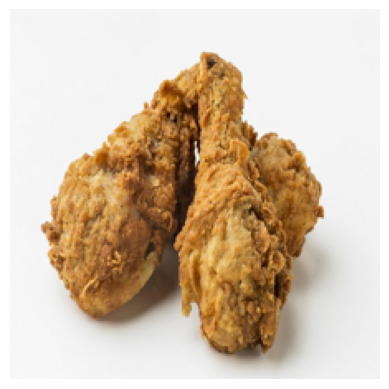

🔍 Predicted Label: ayam_goreng
✅ Confidence Value: 1.00


In [36]:
# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path="/kaggle/working/models/tflite/model_tf.tflite")
interpreter.allocate_tensors()

# Input/output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
img_size = (224, 224)

# Labels
labels = [
    'ayam_goreng',
    'burger',
    'donat',
    'kentang_goreng',
    'mie'
]

# Upload image
image_path = "/kaggle/input/test-inference/ayam_goweng.jpg"

img = Image.open(image_path).convert('RGB')
img = img.resize(img_size)
input_data = np.expand_dims(img, axis=0).astype(np.float32)
input_data /= 255.0

interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])[0]

predicted_index = np.argmax(output_data)
predicted_label = labels[predicted_index]
confidence = output_data[predicted_index]

# Show result of the prediction and the image
plt.imshow(img)
plt.axis('off')
plt.show()

print(f"🔍 Predicted Label: {predicted_label}")
print(f"✅ Confidence Value: {confidence:.2f}")

# 8. Archiving the Project Folder

In [37]:
!zip -r /kaggle/working/export_project.zip /kaggle/working

  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/.virtual_documents/ (stored 0%)
  adding: kaggle/working/splitted_dataset/ (stored 0%)
  adding: kaggle/working/splitted_dataset/test/ (stored 0%)
  adding: kaggle/working/splitted_dataset/test/ayam_goreng/ (stored 0%)
  adding: kaggle/working/splitted_dataset/test/ayam_goreng/Ayam Goreng_207.jpg (deflated 20%)
  adding: kaggle/working/splitted_dataset/test/ayam_goreng/Ayam Goreng_092.jpg (deflated 0%)
  adding: kaggle/working/splitted_dataset/test/ayam_goreng/Ayam Goreng_404.jpg (deflated 5%)
  adding: kaggle/working/splitted_dataset/test/ayam_goreng/Ayam Goreng_250.jpg (deflated 0%)
  adding: kaggle/working/splitted_dataset/test/ayam_goreng/Ayam Goreng_382.jpg (deflated 1%)
  adding: kaggle/working/splitted_dataset/test/ayam_goreng/Ayam Goreng_277.jpg (deflated 1%)
  adding: kaggle/working/splitted_dataset/test/ayam_goreng/Ayam Goreng_365.jpg (deflated 2%)
  adding: kaggle/working/splitted_dataset/test/ayam_goreng/Ayam Go